<a href="https://colab.research.google.com/github/JorgePere27/fraud_detect/blob/main/Financial_Fraud_Detection_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




La urgencia por detectar fraudes en transacciones móviles de dinero ha llevado a una empresa del segmento Fintech a buscar soluciones innovadoras. Como científicos de datos hemos sido convocados para desarrollar un modelo de machine learning que pueda distinguir de manera precisa entre transacciones legítimas y fraudulentas, estableciendo así un estándar de seguridad en el sector financiero móvil global.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la detección de transacciones bancarias fraudulentas.

#**1. Configuración del Ambiente**


---




In [1]:
#comenzamos importando las librerias que vamos a utilizar e instalando los paquetes necesarios
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
!pip install -U imbalanced-learn
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.ticker as ticker
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=741d87083cecab6612d2a0c0fbabd9a2d898d783073e6cc9a11b5929909cfd4e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 2.0.3
------
Name: matplotlib
Version: 3.7.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**2. Preprocesamiento de Datos**


---

Para comenzar con el analísis del problema es necesario realizar el preprocesamiento de los datos para saber si existen algunas situaciones que requieran de nuestra atención y que en el futuro puedan traernos algunas dificultades.

Lo primero es vaciar nuestros datos en un dataframe de pandas, en este caso estamos utulizando un archivo obtenido de Pay Sim.

PaySim simula transacciones de dinero móvil basadas en una muestra de transacciones reales extraídas de un mes de registros financieros de un servicio de dinero móvil implementado en un país africano. Los registros originales fueron proporcionados por una empresa multinacional, que es el proveedor del servicio financiero móvil que actualmente opera en más de 14 países en todo el mundo.

Este conjunto de datos sintéticos se ha reducido a 1/4 del conjunto de datos original y se ha creado exclusivamente para Kaggle.



In [100]:
#Cargamos la base de datos en un dataframe de pandas y visualizamos una muestra
df_banco = pd.read_csv("fraud_detect.csv")
df_banco.head()

step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT  1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER   181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT   181.00   C840083671         181.00            0.00   
4     1   PAYMENT 11668.14  C2048537720       41554.00        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155            0.00            0.00        0               0  
1  M2044282225            0.00            0.00        0               0  
2   C553264065            0.00            0.00        1               0  
3    C38997010        21182.00            0.00        1               0  
4  M1230701703            0.00            0.00        0               0

In [101]:
#verificamos la información general de nuestros datos
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Observamos que el conjunto de datos contiene las siguientes columnas:



*   step - Indica una unitdad de tiempo en el mundo real. En este caso 1 step es 1 hora de tiempo. Total de steps 744 (simulación de 31 dias).
*   type - El tipo de transacción ya sea CASH-IN, CASH-OUT, DEBIT, PAYMENT o TRANSFER.
* amount - Cantidad de la transacción.
* nameOrig - Cliente que empieza la transacción.
* oldbalanceOrg - Saldo inicial antes de la transacción.
* newbalanceOrg - Saldo nuevo después de la transacción.
* nameDest - Cliente que recibe la transacción.
* oldbalanceDest - Saldo inicial del receptor antes de la transacción.
* newbalanceDest - Saldo nuevo del receptor después de la transacción.
* isFraud - Indica si la transacción realizada es fraudulenta.
* isFlaggedFraud - El modelo de negocio tiene como objetivo controlar transferencias masivas de una cuenta a otra y marcar los intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción.




Como primer paso utilizamos la información dada por la columna step, que representa una unidad de tiempo en horas para determinar la fecha y hora de la transacción.

In [102]:
#Buscamos el maximo de la columna step
df_banco['step'].max()

743

In [103]:
#Buscamos el mínimo de la columna step
df_banco['step'].min()

1

In [104]:
#dividimos la columna de step en 31 rangos para determinar los 31 dias del mes
df_banco['date'] = pd.cut(df_banco['step'], 31, labels = ['1','2','3','4','5','6','7','8','9','10',
                                                          '11','12','13','14','15','16','17','18','19','20',
                                                          '21','22','23','24','25','26','27','28','29','30','31'])

In [105]:
#verificamos que todas los rangos tengan datos
df_banco['date'].value_counts().sort_index()

date
1     574255
2     455238
3       1070
4      28240
5       9789
6     441005
7     420583
8     449637
9     417919
10    392945
11    417859
12    349776
13    428583
14    397876
15    401282
16    372006
17    421098
18     29251
19     11286
20     19739
21     24589
22     52510
23     50432
24     33349
25     58712
26     13893
27      8574
28     14522
29     55037
30     11283
31       282
Name: count, dtype: int64

In [106]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            object  
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         int64   
 10  isFlaggedFraud  int64   
 11  date            category
dtypes: category(1), float64(5), int64(3), object(3)
memory usage: 540.0+ MB


In [107]:
df_banco[df_banco['date'] == '31']

step      type     amount     nameOrig  oldbalanceOrg  \
6362338   720  TRANSFER   79039.81  C1468845762       79039.81   
6362339   720  CASH_OUT   79039.81   C838045354       79039.81   
6362340   720  TRANSFER   40075.02  C1996558397       40075.02   
6362341   720  CASH_OUT   40075.02  C1765193112       40075.02   
6362342   720  TRANSFER  561027.94  C1493011618      561027.94   
...       ...       ...        ...          ...            ...   
6362615   743  CASH_OUT  339682.13   C786484425      339682.13   
6362616   743  TRANSFER 6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT 6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER  850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT  850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362338            0.00  C1226285099            0.00            0.00        1   
6362339            0.00  C1980653895     11270532.70     11349572.51        1   
6362340            0.00  C2122089181            0.00            0.00        1   
6362341            0.00   C153506501            0.00        40075.02        1   
6362342            0.00  C1620712399            0.00            0.00        1   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud date  
6362338               0   31  
6362339               0   31  
6362340               0   31  
6362341               0   31  
6362342               0   31  
...                 ...  ...  
6362615               0   31  
6362616               0   31  
6362617               0   31  
6362618               0   31  
6362619               0   31  

[282 rows x 12 columns]

In [108]:
#Determinamos la hora de la transacción mediante la operación de modulo de 24
df_banco['hour'] = (df_banco['step'] - 1) % 24 + 1

In [109]:
#Verificamos que se hayan generado las columnas requeridas
df_banco.head()

step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT  1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER   181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT   181.00   C840083671         181.00            0.00   
4     1   PAYMENT 11668.14  C2048537720       41554.00        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud date  \
0  M1979787155            0.00            0.00        0               0    1   
1  M2044282225            0.00            0.00        0               0    1   
2   C553264065            0.00            0.00        1               0    1   
3    C38997010        21182.00            0.00        1               0    1   
4  M1230701703            0.00            0.00        0               0    1   

   hour  
0     1  
1     1  
2     1  
3     1  
4     1

In [110]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            object  
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         int64   
 10  isFlaggedFraud  int64   
 11  date            category
 12  hour            int64   
dtypes: category(1), float64(5), int64(4), object(3)
memory usage: 588.6+ MB


In [111]:
#trasformamos date a int por conveniencia del análisis
df_banco['date']=df_banco['date'].astype(int)

Una vez determinadas tanto fecha como hora, procededemos a analizar la columna amount para ver que información podemos determinar a partir de esta.

Comenzamos obteniendo máximo y mínimo de la columna amount.

In [112]:
#minimo de amount
df_banco['amount'].min()

0.0

In [113]:
#Máximo de amount
df_banco['amount'].max()

92445516.64

In [114]:
#Observamos el registro con amount máximo
df_banco[df_banco['amount']==92445516.64]

step      type      amount     nameOrig  oldbalanceOrg  \
3686583   276  TRANSFER 92445516.64  C1715283297           0.00   

         newbalanceOrig    nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3686583            0.00  C439737079         9595.98     92455112.62        0   

         isFlaggedFraud  date  hour  
3686583               0    12    12

Tenemos que el máximo de **$92,445,516.64** y un mínimo de **0**, lo cual es curioso, posiblemente se tratan de operaciones canceladas, error humano o ruido del sistema, mas adelante verificaremos la cantidad para determinar si dicha situación puede afectar en el entrenamiento y generación del modelo de machine learning.

In [115]:
df_banco.describe()

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count 6362620.00  6362620.00     6362620.00      6362620.00      6362620.00   
mean      243.40   179861.90      833883.10       855113.67      1100701.67   
std       142.33   603858.23     2888242.67      2924048.50      3399180.11   
min         1.00        0.00           0.00            0.00            0.00   
25%       156.00    13389.57           0.00            0.00            0.00   
50%       239.00    74871.94       14208.00            0.00       132705.66   
75%       335.00   208721.48      107315.18       144258.41       943036.71   
max       743.00 92445516.64    59585040.37     49585040.37    356015889.35   

       newbalanceDest    isFraud  isFlaggedFraud       date       hour  
count      6362620.00 6362620.00      6362620.00 6362620.00 6362620.00  
mean       1224996.40       0.00            0.00      10.49      15.59  
std        3674128.94       0.04            0.00       5.93       4.10  
min              0.00       0.00            0.00       1.00       1.00  
25%              0.00       0.00            0.00       7.00      12.00  
50%         214661.44       0.00            0.00      10.00      16.00  
75%        1111909.25       0.00            0.00      14.00      19.00  
max      356179278.92       1.00            1.00      31.00      24.00

Procedemos a sacar el monto total de las transacciones legales y las fraudulentas y las tasas de estos valores.

In [116]:
#suma total de amount
total_sum_amount = df_banco['amount'].sum()
total_sum_amount

1144392944759.77

El total de las transacciones es de **1,144,392,944,759.77**.

In [117]:
#quitamos la notacion cientifica para mejor visualización
pd.set_option('display.float_format', '{:.2f}'.format)

In [118]:
#creamos un pivot table para agrupar
total_table = pd.pivot_table(df_banco, values = 'amount', index = 'isFraud',aggfunc='sum')
total_table['tasa']= (total_table['amount']*100)/total_sum_amount
total_table

amount  tasa
isFraud                       
0       1132336529331.93 98.95
1         12056415427.84  1.05

Observamos que el porcentaje de las transacciones fraudulentas en bajo un 1.05%, pero esto representa la cantidad de **12,056,415,427.84**, por lo tanto no deben de ser ignoradas.

Generamos un boxplot para analizar la columna de amount y ver su comportamiento.

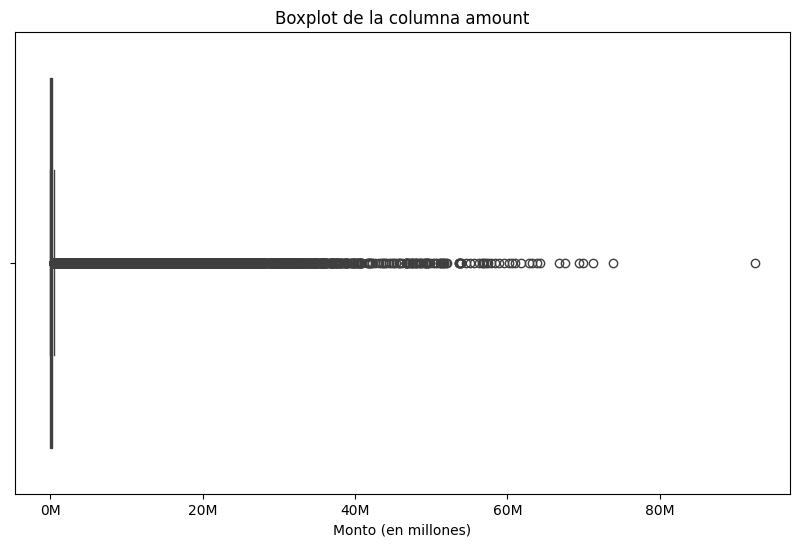

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_banco['amount'])
# Formatear el eje x para que muestre valores en millones
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
plt.title('Boxplot de la columna amount')
plt.xlabel('Monto (en millones)')
# Mostrar el gráfico
plt.show()

Debido a la presencia de valores atípicos no podemos observar de manera correcta la gráfica.

Determinamos el umbral de 60 millones para los valores atípicos.

In [120]:
df_banco[df_banco['amount']>=60000000]

step      type      amount     nameOrig  oldbalanceOrg  \
3682190   276  TRANSFER 60965275.64   C453740720           0.00   
3686583   276  TRANSFER 92445516.64  C1715283297           0.00   
3733545   278  TRANSFER 60154456.05    C31593462           0.00   
3892529   284  TRANSFER 64234448.19  C1139847449           0.00   
3911956   284  TRANSFER 69337316.27  C1584456031           0.00   
3934249   285  TRANSFER 60642003.00    C68968235           0.00   
3937152   286  TRANSFER 67500761.29   C811810230           0.00   
3946920   286  TRANSFER 69886731.30  C1425667947           0.00   
3991638   298  TRANSFER 63847992.58   C300140823           0.00   
4060598   300  TRANSFER 73823490.36  C2127282686           0.00   
4076755   301  TRANSFER 62785416.91  C1539737626           0.00   
4105338   302  TRANSFER 66761272.21   C420748282           0.00   
4143417   303  TRANSFER 61733761.65   C915403211           0.00   
4143801   303  TRANSFER 63294839.63   C372535854           0.00   
4146397   303  TRANSFER 71172480.42  C2044643633           0.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3682190            0.00  C1676302617            0.00     60965275.64        0   
3686583            0.00   C439737079         9595.98     92455112.62        0   
3733545            0.00   C172409641     68187825.99    128342282.04        0   
3892529            0.00    C65111466     65976908.56    166302068.86        0   
3911956            0.00  C1472140329    113007240.28    182344556.54        0   
3934249            0.00   C167875008     90896707.86    151538710.86        0   
3937152            0.00  C1757599079     86356149.52    153856910.81        0   
3946920            0.00   C167875008    151538710.86    221425442.16        0   
3991638            0.00   C514940761     72171494.33    136019486.91        0   
4060598            0.00   C753026640     93624010.19    167447500.55        0   
4076755            0.00  C1774146551    142473625.74    205259042.65        0   
4105338            0.00  C1073241084     68742058.42    135503330.62        0   
4143417            0.00   C744189981    189381199.14    251114960.79        0   
4143801            0.00  C1871605747     75125284.21    138420123.84        0   
4146397            0.00    C84111522    113461513.64    184633994.07        0   

         isFlaggedFraud  date  hour  
3682190               0    12    12  
3686583               0    12    12  
3733545               0    12    14  
3892529               0    12    20  
3911956               0    12    20  
3934249               0    12    21  
3937152               0    12    22  
3946920               0    12    22  
3991638               0    13    10  
4060598               0    13    12  
4076755               0    13    13  
4105338               0    13    14  
4143417               0    13    15  
4143801               0    13    15  
4146397               0    13    15

In [121]:
#eliminamos valores por encima del umbral
df_banco = df_banco[df_banco['amount'] < 60000000]

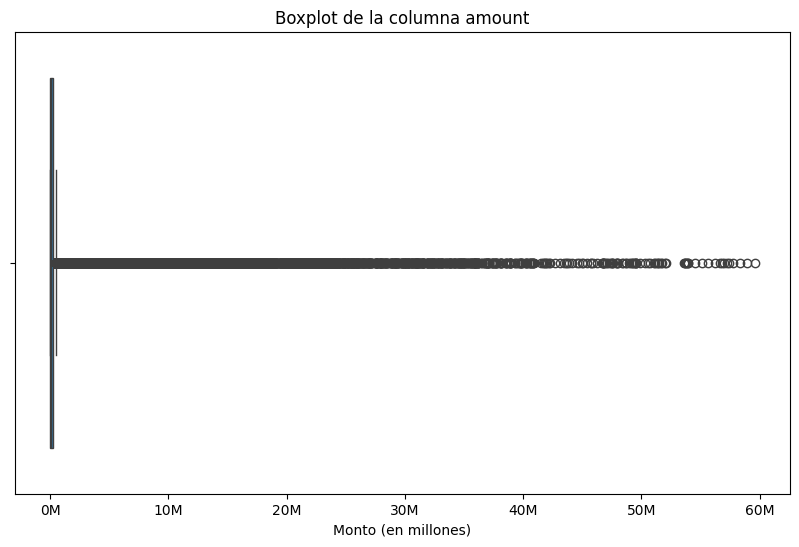

In [122]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_banco['amount'])
# Formatear el eje x para que muestre valores en millones
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
# Añadir título y etiquetas
plt.title('Boxplot de la columna amount')
plt.xlabel('Monto (en millones)')
# Mostrar el gráfico
plt.show()

Observamos que no fue suciente el tratamiento anterior, pero el seguir eliminando datos pos puede traer problemas a la hora del entrenamiento por lo que para cuestiones de visualización y análisis optamos por despreciar los valores atipicos de la gráfica.

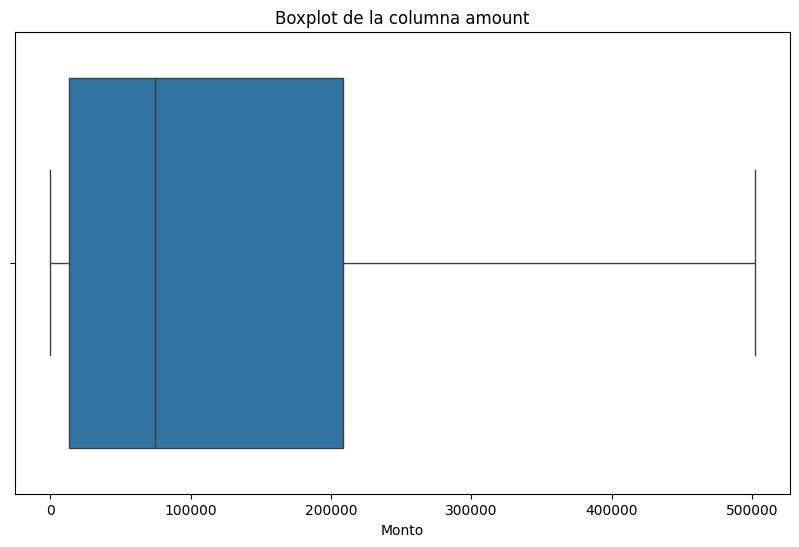

In [123]:
# Crear el boxplot despreciando los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_banco['amount'], showfliers = False)
# Añadir título y etiquetas
plt.title('Boxplot de la columna amount')
plt.xlabel('Monto')
# Mostrar el gráfico
plt.show()

Observamos que la mayoria de las transacciónes se encuentran ligeramente arriba de los **200,000** por lo que debemos de poner especial atención a transacciones que sean mayores a dicho valor.

Procedemos a analizar los datos con amount igual a cero.

In [124]:
df_banco[df_banco['amount']==0]

step      type  amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2736447   212  CASH_OUT    0.00  C1510987794           0.00            0.00   
3247298   250  CASH_OUT    0.00   C521393327           0.00            0.00   
3760289   279  CASH_OUT    0.00   C539112012           0.00            0.00   
5563714   387  CASH_OUT    0.00  C1294472700           0.00            0.00   
5996408   425  CASH_OUT    0.00   C832555372           0.00            0.00   
5996410   425  CASH_OUT    0.00    C69493310           0.00            0.00   
6168500   554  CASH_OUT    0.00    C10965156           0.00            0.00   
6205440   586  CASH_OUT    0.00  C1303719003           0.00            0.00   
6266414   617  CASH_OUT    0.00  C1971175979           0.00            0.00   
6281483   646  CASH_OUT    0.00  C2060908932           0.00            0.00   
6281485   646  CASH_OUT    0.00  C1997645312           0.00            0.00   
6296015   671  CASH_OUT    0.00  C1960007029           0.00            0.00   
6351226   702  CASH_OUT    0.00  C1461113533           0.00            0.00   
6362461   730  CASH_OUT    0.00   C729003789           0.00            0.00   
6362463   730  CASH_OUT    0.00  C2088151490           0.00            0.00   
6362585   741  CASH_OUT    0.00   C312737633           0.00            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
2736447  C1696624817            0.00            0.00        1               0   
3247298   C480398193            0.00            0.00        1               0   
3760289  C1106468520       538547.63       538547.63        1               0   
5563714  C1325541393      7970766.57      7970766.57        1               0   
5996408  C1462759334        76759.90        76759.90        1               0   
5996410   C719711728      2921531.34      2921531.34        1               0   
6168500  C1493336195       230289.66       230289.66        1               0   
6205440   C900608348      1328472.86      1328472.86        1               0   
6266414  C1352345416            0.00            0.00        1               0   
6281483  C1587892888            0.00            0.00        1               0   
6281485   C601248796            0.00            0.00        1               0   
6296015   C459118517        27938.72        27938.72        1               0   
6351226  C1382150537       107777.02       107777.02        1               0   
6362461  C1388096959      1008609.53      1008609.53        1               0   
6362463  C1156763710            0.00            0.00        1               0   
6362585  C1400061387       267522.87       267522.87        1               0   

         date  hour  
2736447     9    20  
3247298    11    10  
3760289    12    15  
5563714    17     3  
5996408    18    17  
5996410    18    17  
6168500    24     2  
6205440    25    10  
6266414    26    17  
6281483    27    22  
6281485    27    22  
6296015    28    23  
6351226    30     6  
6362461    31    10  
6362463    31    10  
6362585    31    21

Si una transacción CASH_OUT tiene un monto de cero, podría indicar una transacción de prueba o un error en los datos. En un contexto real, no tendría sentido retirar cero unidades de dinero, especialmente en una operación clasificada como fraude.



In [125]:
df_banco[df_banco['amount']==0].shape

(16, 13)

Al ser un valor demasiado bajo en relación a la totalidad de los registros procedemos a eliminar los datos con un valor 0 en amount.

In [126]:
df_banco = df_banco[df_banco['amount'] != 0]

In [127]:
df_banco.shape

(6362589, 13)

In [128]:
df_banco.head()

step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT  1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER   181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT   181.00   C840083671         181.00            0.00   
4     1   PAYMENT 11668.14  C2048537720       41554.00        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  date  \
0  M1979787155            0.00            0.00        0               0     1   
1  M2044282225            0.00            0.00        0               0     1   
2   C553264065            0.00            0.00        1               0     1   
3    C38997010        21182.00            0.00        1               0     1   
4  M1230701703            0.00            0.00        0               0     1   

   hour  
0     1  
1     1  
2     1  
3     1  
4     1

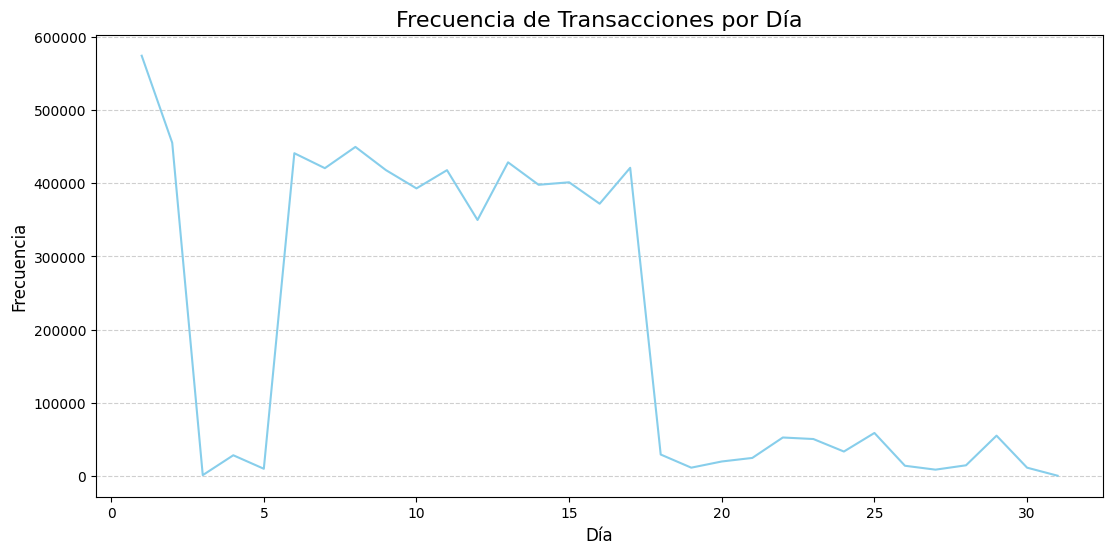

In [129]:
#gráficamos la frecuencia de transacciones por dia
plt.figure(figsize=(13, 6))
df_banco['date'].value_counts().sort_index().plot(kind='line', color='skyblue')
plt.title('Frecuencia de Transacciones por Día', fontsize=16)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

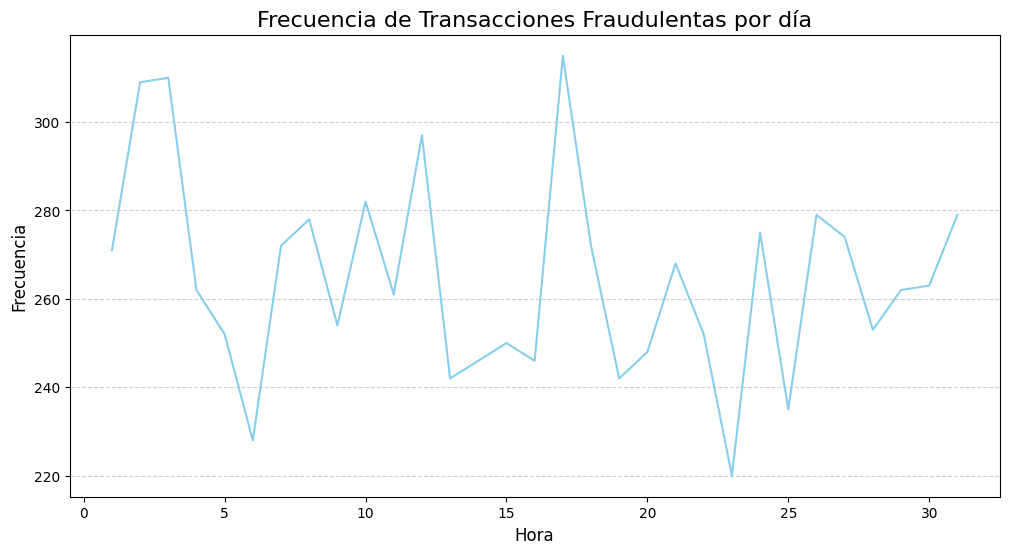

In [130]:
#Gráficamos la frecuencia de transacciones fraudulentas
df_fraude = df_banco[df_banco['isFraud'] == 1]
# Crear el gráfico de por horas
plt.figure(figsize=(12, 6))
df_fraude['date'].value_counts().sort_index().plot(kind='line', color='skyblue')
plt.title('Frecuencia de Transacciones Fraudulentas por día', fontsize=16)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

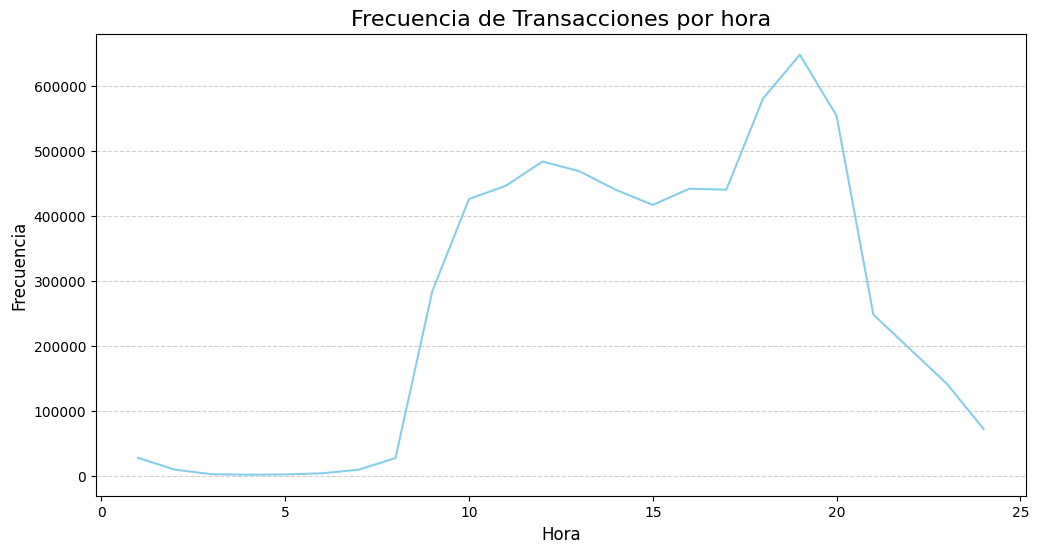

In [131]:
# Graficamos la fracuencia de transacciones por hora
plt.figure(figsize=(12, 6))
df_banco['hour'].value_counts().sort_index().plot(kind='line', color='skyblue')
plt.title('Frecuencia de Transacciones por hora', fontsize=16)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

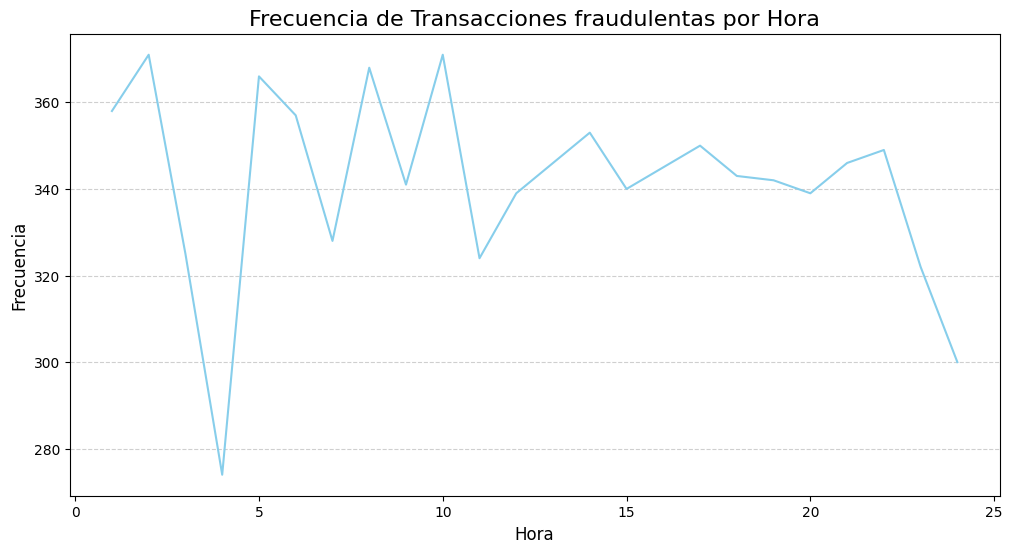

In [132]:
#Gráficamos la Frecuencia de transacciones fraudulentas por día
df_fraude = df_banco[df_banco['isFraud'] == 1]
# Crear el gráfico de barras por horas
plt.figure(figsize=(12, 6))
df_fraude['hour'].value_counts().sort_index().plot(kind='line', color='skyblue')
plt.title('Frecuencia de Transacciones fraudulentas por Hora', fontsize=16)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

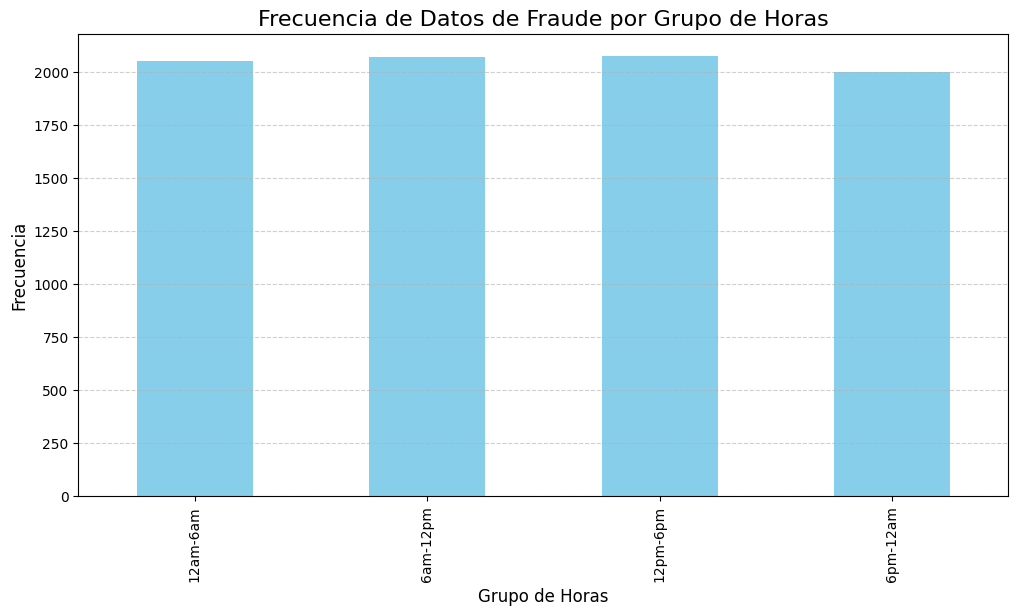

In [133]:
# Crear una nueva columna 'hour_group' que represente los grupos de horas
df_fraude['hour_group'] = pd.cut(df_fraude['hour'], bins=[0, 6, 12, 18, 24], labels=['12am-6am', '6am-12pm', '12pm-6pm', '6pm-12am'], include_lowest=True)
plt.figure(figsize=(12, 6))
df_fraude['hour_group'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Datos de Fraude por Grupo de Horas', fontsize=16)
plt.xlabel('Grupo de Horas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [134]:
df_banco['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)



1. **PAYMENT (Pago):** Una transferencia de fondos realizada para realizar un pago a un comerciante o proveedor de servicios. Por ejemplo, pagar una factura de servicios públicos o realizar una compra en línea.

2. **TRANSFER (Transferencia):** Una transferencia de fondos entre cuentas bancarias, ya sea entre cuentas del mismo banco o entre cuentas de diferentes bancos. Puede ser una transferencia a otra persona, una empresa o una cuenta propia en otro banco.

3. **CASH_OUT (Retiro de efectivo):** Una transferencia de fondos que implica retirar efectivo de una cuenta bancaria. Esto podría incluir retiros en cajeros automáticos, en sucursales bancarias o transferencias de fondos a cuentas externas para luego retirar el efectivo.

4. **DEBIT (Débito):** Una transacción que resulta en la reducción del saldo de una cuenta bancaria, como una compra con tarjeta de débito, un pago de facturas o una transferencia de fondos que sale de la cuenta.

5. **CASH_IN (Depósito de efectivo):** Una transferencia de fondos que implica depositar efectivo en una cuenta bancaria. Esto podría incluir depósitos en cajeros automáticos, en sucursales bancarias o transferencias de fondos desde otras cuentas.

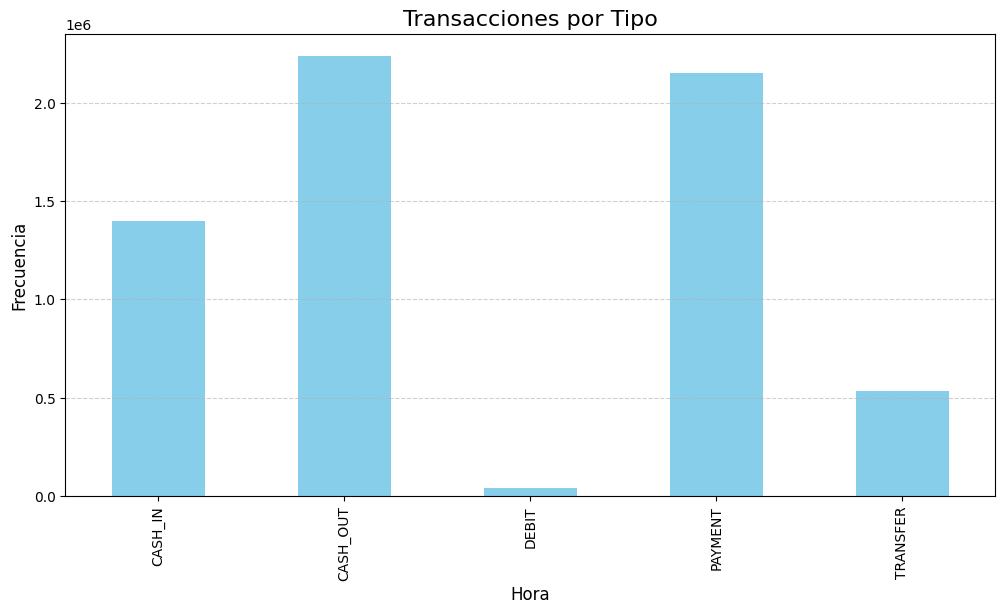

In [135]:
#Gráficamos las transacciones de por tipo
plt.figure(figsize=(12, 6))
df_banco['type'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Transacciones por Tipo', fontsize=16)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

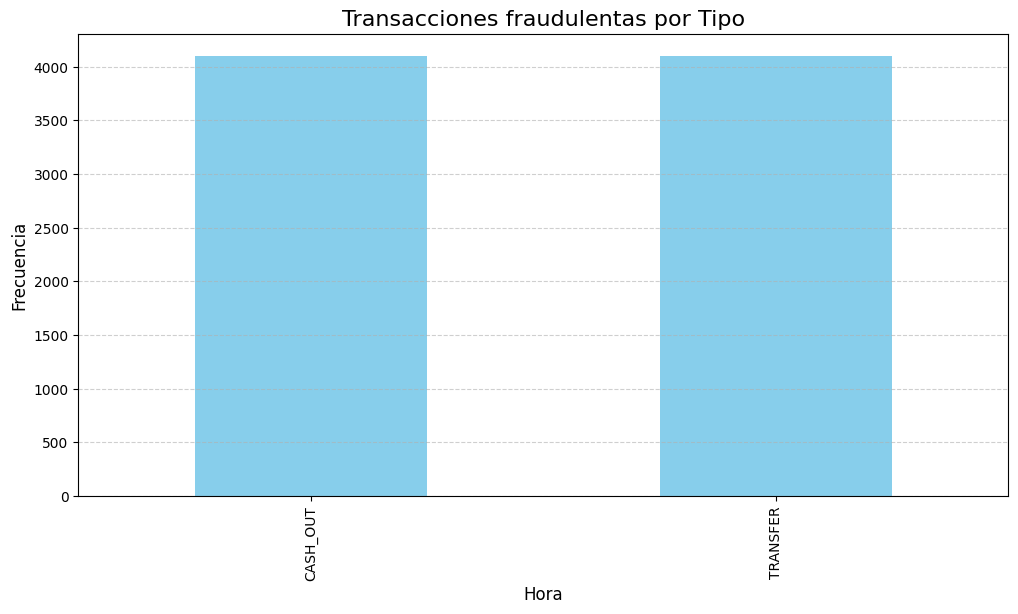

In [136]:
#Graficamos las transferencias fraudulentas por tipo
plt.figure(figsize=(12, 6))
df_fraude['type'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Transacciones fraudulentas por Tipo', fontsize=16)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

En la columna "type" de tu conjunto de datos, parece que los tipos de transacciones que generan más fraudes son las transferencias (TRANSFER) y los retiros en efectivo (CASH_OUT). Esto significa que las transacciones de transferencia entre cuentas bancarias y los retiros de efectivo son los tipos de transacciones más propensos a ser fraudulentos

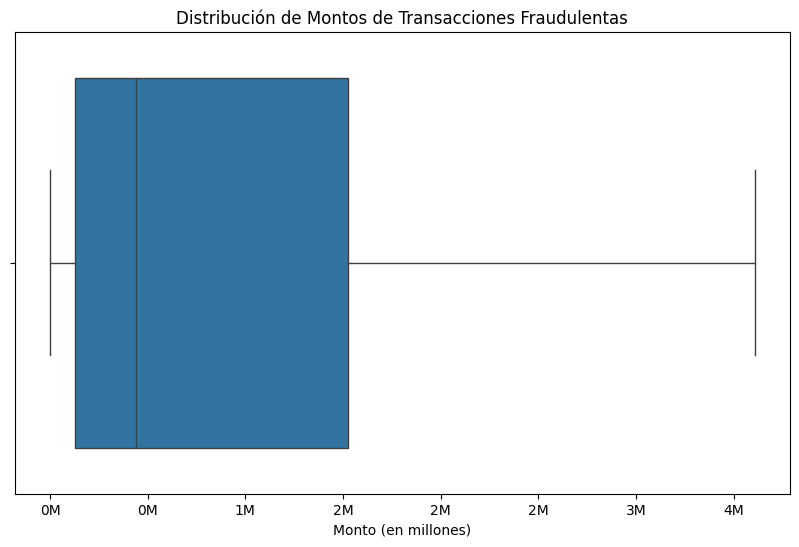

In [137]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_fraude['amount'], showfliers=False)
# Formatear el eje x para que muestre valores en millones
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
# Añadir título y etiquetas
plt.title('Distribución de Montos de Transacciones Fraudulentas')
plt.xlabel('Monto (en millones)')
# Mostrar el gráfico
plt.show()

Procedemos a crear una columna type2 que nos indique el origen y destino de la transacción y a eliminar las columnas oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, que no nos ayudan en la deteccion de fraude ya que las transacciones marcadas como fraudulentas son canceladas.

In [138]:
#@title
def procesar_datos():
  global df_banco
  #crear variable type 2 con las primeras letras de nameOrig y nameDest
  df_banco['type2'] = df_banco.nameOrig.str[0] + df_banco.nameDest.str[0]
  #Aplicar One hot encoder usando el metodo get_dummies
  df_banco = pd.get_dummies(df_banco, columns=['type', 'type2'], dtype=int)
   # Elimina columnas prescindibles
  df_banco.drop(columns=[
        'nameOrig', 'nameDest', 'isFlaggedFraud',
        'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest'
    ], inplace=True)
  df_banco = df_banco.drop_duplicates()
  df_banco = df_banco.dropna()

In [139]:
#ejecutamos la función
procesar_datos()

In [140]:
#verificamos que se hayan realizado los cambios correctamente
df_banco

step     amount  isFraud  date  hour  type_CASH_IN  type_CASH_OUT  \
0           1    9839.64        0     1     1             0              0   
1           1    1864.28        0     1     1             0              0   
2           1     181.00        1     1     1             0              0   
3           1     181.00        1     1     1             0              1   
4           1   11668.14        0     1     1             0              0   
...       ...        ...      ...   ...   ...           ...            ...   
6362615   743  339682.13        1    31    23             0              1   
6362616   743 6311409.28        1    31    23             0              0   
6362617   743 6311409.28        1    31    23             0              1   
6362618   743  850002.52        1    31    23             0              0   
6362619   743  850002.52        1    31    23             0              1   

         type_DEBIT  type_PAYMENT  type_TRANSFER  type2_CC  type2_CM  
0                 0             1              0         0         1  
1                 0             1              0         0         1  
2                 0             0              1         1         0  
3                 0             0              0         1         0  
4                 0             1              0         0         1  
...             ...           ...            ...       ...       ...  
6362615           0             0              0         1         0  
6362616           0             0              1         1         0  
6362617           0             0              0         1         0  
6362618           0             0              1         1         0  
6362619           0             0              0         1         0  

[6354995 rows x 12 columns]

In [141]:
df_banco.describe()

step      amount    isFraud       date       hour  type_CASH_IN  \
count 6354995.00  6354995.00 6354995.00 6354995.00 6354995.00    6354995.00   
mean      243.38   175154.89       0.00      10.49      15.59          0.22   
std       142.36   555412.36       0.04       5.93       4.10          0.41   
min         1.00        0.01       0.00       1.00       1.00          0.00   
25%       155.00    13409.08       0.00       7.00      12.00          0.00   
50%       239.00    74904.27       0.00      10.00      16.00          0.00   
75%       335.00   208589.54       0.00      14.00      19.00          0.00   
max       743.00 59579503.33       1.00      31.00      24.00          1.00   

       type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER   type2_CC  \
count     6354995.00  6354995.00    6354995.00     6354995.00 6354995.00   
mean            0.35        0.01          0.34           0.08       0.66   
std             0.48        0.08          0.47           0.28       0.47   
min             0.00        0.00          0.00           0.00       0.00   
25%             0.00        0.00          0.00           0.00       0.00   
50%             0.00        0.00          0.00           0.00       1.00   
75%             1.00        0.00          1.00           0.00       1.00   
max             1.00        1.00          1.00           1.00       1.00   

        type2_CM  
count 6354995.00  
mean        0.34  
std         0.47  
min         0.00  
25%         0.00  
50%         0.00  
75%         1.00  
max         1.00

In [142]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6354995 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   step           int64  
 1   amount         float64
 2   isFraud        int64  
 3   date           int64  
 4   hour           int64  
 5   type_CASH_IN   int64  
 6   type_CASH_OUT  int64  
 7   type_DEBIT     int64  
 8   type_PAYMENT   int64  
 9   type_TRANSFER  int64  
 10  type2_CC       int64  
 11  type2_CM       int64  
dtypes: float64(1), int64(11)
memory usage: 630.3 MB


#**3. Exploración de Datos**


---


In [ ]:
#ejecutamos el profile report para análisis adicional
ProfileReport(df_banco)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

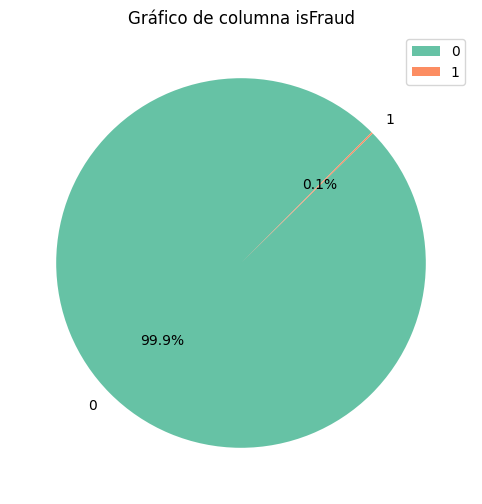

In [143]:
#Obsevamos un desbalance en la columna de is Fraud
target='isFraud'
valores = df_banco[target].value_counts()
etiqueta = df_banco[target].unique()
plt.figure(figsize=(9,6))
plt.pie(valores,labels=etiqueta,autopct="%1.1f%%", colors= ['#66c2a5', '#fc8d62'], startangle=45)
plt.legend(loc='best')
plt.title('Gráfico de columna isFraud')
plt.show()

Para evitar que el modelo tienda a precedir datos como no fraude, es necesario realizar un balanceo en la columna, para dicha tarea ejecutamos un undersampling de los 0's y luego un oversampling de los 1's.

In [144]:
def balanceo_clases():
  global df_banco
  #Balanceo con under_sampling
  # Calcular cuántas muestras mantener en la clase 0
  porcentaje_mantener = 0.1
  n_muestras_clase0_mantener = int(len(df_banco[df_banco['isFraud'] == 0]) * porcentaje_mantener)
  # Aplicar RandomUnderSampler para reducir el número de muestras de la clase 0
  undersampler = RandomUnderSampler(sampling_strategy={0: len(df_banco[df_banco['isFraud'] == 0]), 0: n_muestras_clase0_mantener})
  X_resampled, y_resampled = undersampler.fit_resample(df_banco.drop('isFraud', axis=1), df_banco['isFraud'])
  # Actualizar el DataFrame df_banco1 con las muestras undersampled
  df_banco = pd.DataFrame(X_resampled, columns=df_banco.drop('isFraud', axis=1).columns)
  df_banco['isFraud'] = y_resampled

  #Balanceo con SMOTE
  X = df_banco.drop('isFraud', axis = 1)
  y = df_banco['isFraud']
  smt = SMOTE(random_state=125)
  X, y = smt.fit_resample(X, y)
  #unimos los datos
  df_banco = pd.concat([X,y], axis = 1)
  df_banco = df_banco.drop_duplicates()

In [145]:
#ejecutamos el balanceo
balanceo_clases()

In [ ]:
ProfileReport(df_banco)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

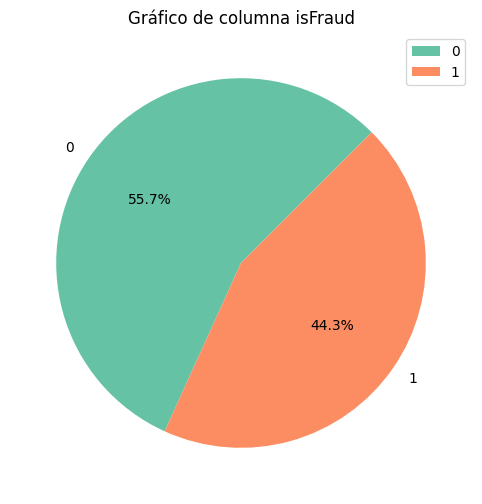

In [146]:
#vefificamos que se haya realizado el balanceo correctamente
target='isFraud'
valores = df_banco[target].value_counts()
etiqueta = df_banco[target].unique()
plt.figure(figsize=(9,6))
plt.pie(valores,labels=etiqueta,autopct="%1.1f%%", colors= ['#66c2a5', '#fc8d62'], startangle=45)
plt.legend(loc='best')
plt.title('Gráfico de columna isFraud')
plt.show()

Creamos un mapa de calor de correlaciones para ver si existe alguna correlacción muy alta que nos pueda acarrear problemas a la hora del entrenamiento.

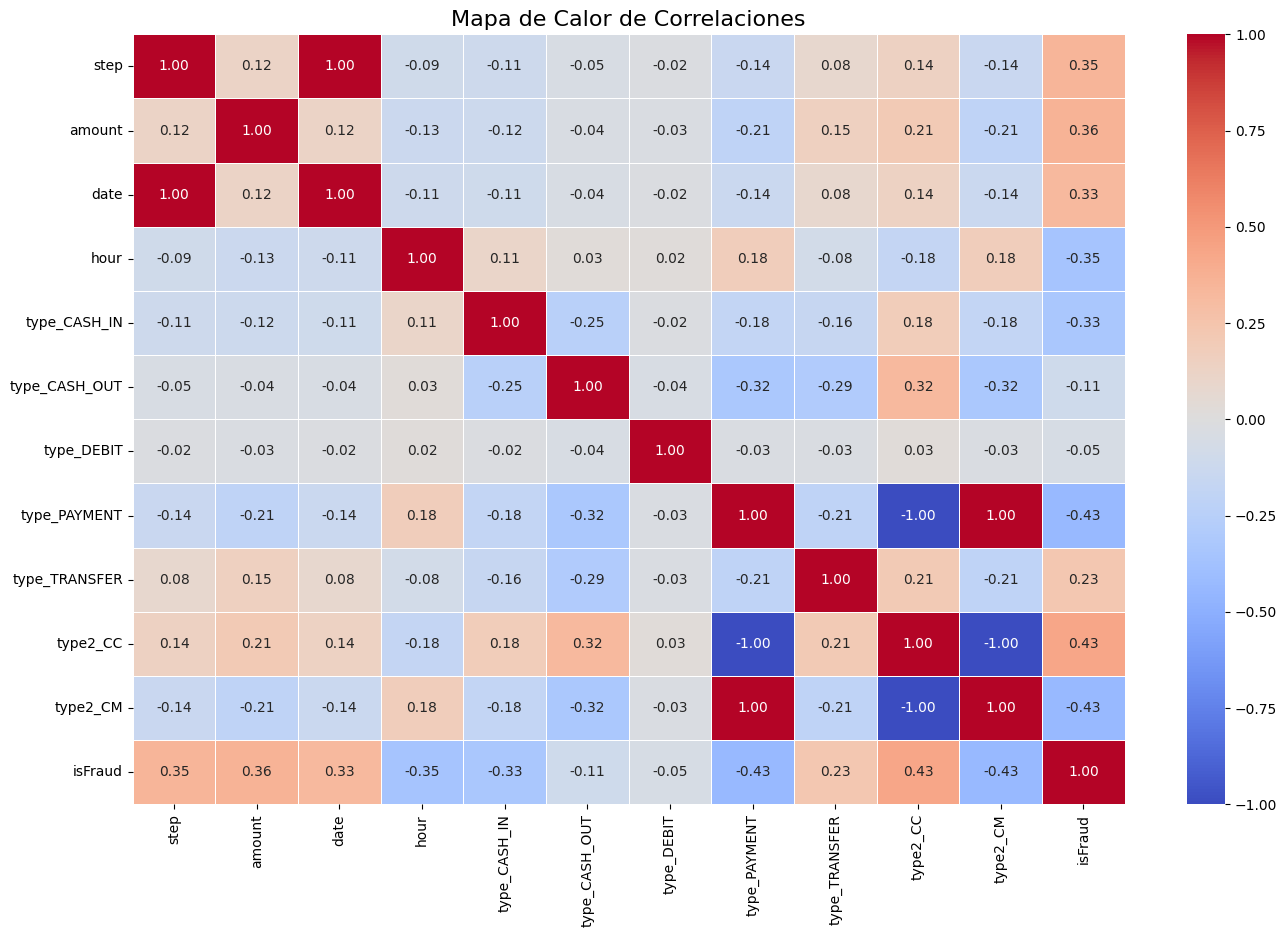

In [147]:
correlation_matrix = df_banco.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones", fontsize=16)
plt.show()

Eliminamos las columnas con alta correlación para evitar problemas en el entreamiento del modelo.

In [148]:
df_banco.drop('type_DEBIT', axis=1, inplace=True)

In [149]:
df_banco.drop('type2_CC', axis=1, inplace=True)

In [150]:
df_banco.drop('type2_CM', axis=1, inplace=True)

In [151]:
df_banco.drop('date', axis=1, inplace=True)

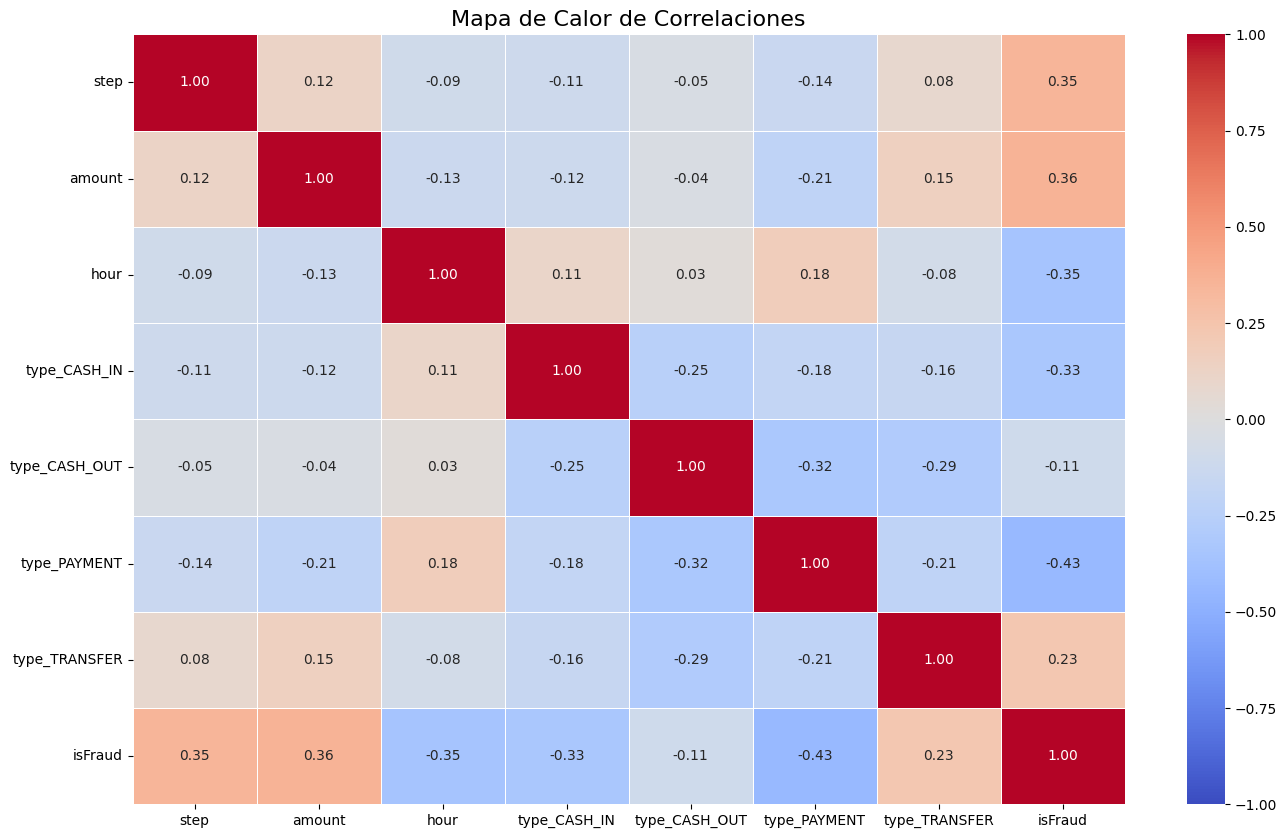

In [152]:
#verificamos los cambios
correlation_matrix = df_banco.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones", fontsize=16)
plt.show()

#**4. Construcción de Modelos**


---

Para la construcción de lo modelos es necesario que las columnas esten en la misma escala por lo que es necesario estandarizarlas.

Seleccionamos 5 modelos para la clasificación del target, los modelos elegidos son:

* Regresión Logística.
* Árbol de desición.
* Random Forest.
* Naive Bayes Gaussiano.
* Naive Beyes Bernoulli.

En el momento de evaluación de los modelos seleccionamos las métricas **Accuracy, Precision, Recall, F1-score y AUC-ROC.**

Creamos una función que cree, entrene y evalue los modelos.

In [153]:
from sklearn.preprocessing import StandardScaler
def crea_modelos():
    global df_banco, resultados

    y = df_banco['isFraud']
    X = df_banco.drop(columns='isFraud')

    # Instanciar el StandardScaler
    scaler = StandardScaler()

    # Ajustar y transformar las características
    X_scaled = scaler.fit_transform(X)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size=0.30, random_state=77)

    # Creamos los modelos de Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes
    modelos = {
        'Regresion Logistica': LogisticRegression(),
        'Arbol de decision': DecisionTreeClassifier(criterion='entropy', random_state=125),
        'Random Forest': RandomForestClassifier(criterion='entropy', random_state=125),
        'Naive Bayes': GaussianNB(),
        'Bernoulli Naive': BernoulliNB()
    }

    # Listas para almacenar métricas
    nombre_modelo = []
    accuracy = []
    precision = []
    recall = []
    f1 = []
    auc = []

    # Probar cada modelo
    for nombre, modelo in modelos.items():
        modelo.fit(train_x, train_y)
        predictions = modelo.predict(test_x)

        # Obtén métricas clave
        nombre_modelo.append(nombre)
        accuracy.append(accuracy_score(test_y, predictions))
        precision.append(precision_score(test_y, predictions))
        recall.append(recall_score(test_y, predictions))
        f1.append(f1_score(test_y, predictions))
        auc.append(roc_auc_score(test_y, predictions))

    # Diccionario con resultados finales
    resultados = {
        'Model': nombre_modelo,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'AUC': auc
    }

In [155]:
#ejecutamos la funcion.
crea_modelos()

In [156]:
#Verificamos las métricas de los modelos
for i, model in enumerate(resultados['Model']):
    print(f"Modelo: {model}")
    print(f"Accuracy: {resultados['Accuracy'][i]}")
    print(f"Precisión: {resultados['Precision'][i]}")
    print(f"Recall: {resultados['Recall'][i]}")
    print(f"F1-score: {resultados['F1'][i]}")
    print(f"AUC-ROC: {resultados['AUC' ][i]}\n")

Modelo: Regresion Logistica
Accuracy: 0.8944406398707616
Precisión: 0.8973585166258071
Recall: 0.8597004260724588
F1-score: 0.8781259186424871
AUC-ROC: 0.890849131932454

Modelo: Arbol de decision
Accuracy: 0.9838217820623131
Precisión: 0.9806702051810188
Recall: 0.9827983168814671
F1-score: 0.9817331077508724
AUC-ROC: 0.983715974327711

Modelo: Random Forest
Accuracy: 0.9856626104058017
Precisión: 0.9840918870610043
Recall: 0.9834863842062085
F1-score: 0.9837890424648332
AUC-ROC: 0.9854376280923142

Modelo: Naive Bayes
Accuracy: 0.7539611465229124
Precisión: 0.6425868768546625
Recall: 1.0
F1-score: 0.7824083899722025
AUC-ROC: 0.7793971009624973

Modelo: Bernoulli Naive
Accuracy: 0.8001720837942721
Precisión: 0.8151881209207503
Recall: 0.7089938338582052
F1-score: 0.7583915415808582
AUC-ROC: 0.790745906674361



#**5. Evaluación y Selección del Modelo**


---


In [157]:
mejor_modelo = resultados['Model'][resultados['Accuracy'].index(max(resultados['Accuracy']))]
print("El mejor modelo basado en Accuracy es:", mejor_modelo)

El mejor modelo basado en Accuracy es: Random Forest


Creamos una función que nos permita visualizar de mejor manera las métricas para elegir el modelo mas adecuado.

In [158]:

#@title
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD','#DDA000']
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()
  #tu código aquí

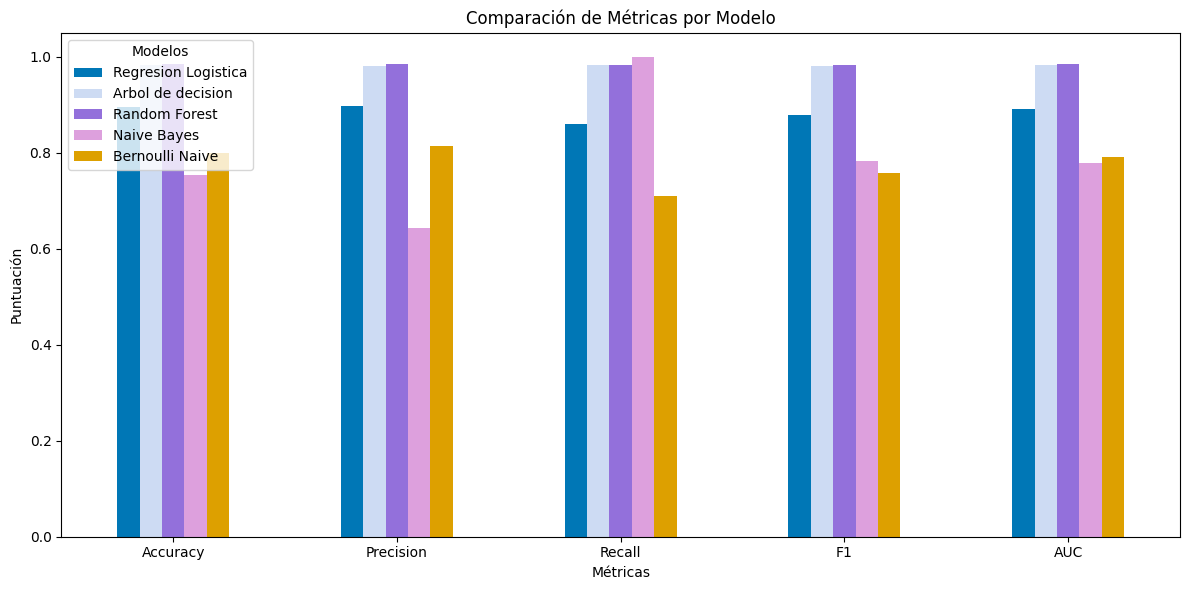

In [159]:
visualiza_resultados()

##Conclusiones

Después del entrenamiento y prueba de todos los modelos, observamos que en la métrica de recall, que es la más relevante para nosotros en este caso porque mide la proporción de verdaderos positivos entre los ejemplos que realmente son positivos, los resultados son prácticamente los mismos tanto para Random Forest como para el árbol de decisión.

Por lo tanto, podemos concluir que elegir cualquiera de estos dos modelos nos dará resultados similares. Sin embargo, si tuviéramos que escoger uno, optaríamos por Random Forest, ya que presenta una mayor precisión (accuracy).